In [1]:
# Importing necessary libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset using pandas
df=pd.read_csv('day.csv')

## Analysing and Cleaning Dataset

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>Observation</b>  `There are no null values in the dataset`

In [6]:
# Renaming columns for better understanding and droppin duplicate records if any
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.drop_duplicates(inplace=True)

<b>Observation</b>  `There are no duplicate values in the dataset`

In [7]:
# Mapping Categorical columns to their respective values.
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weathersit=df.weathersit.map({1:'Clear',2:'Mist/Cloudy',3:'Light Snow/Rain',4:'Heavy Snow/Rain'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [8]:
# Dropping features that are not useful for predictive analysis.
# Instant is an ID column, casual and registered are included in cnt (target) column therefore provide redundant information
df.drop(columns=['instant','dteday','casual','registered'],inplace=True)

### Data Visualization

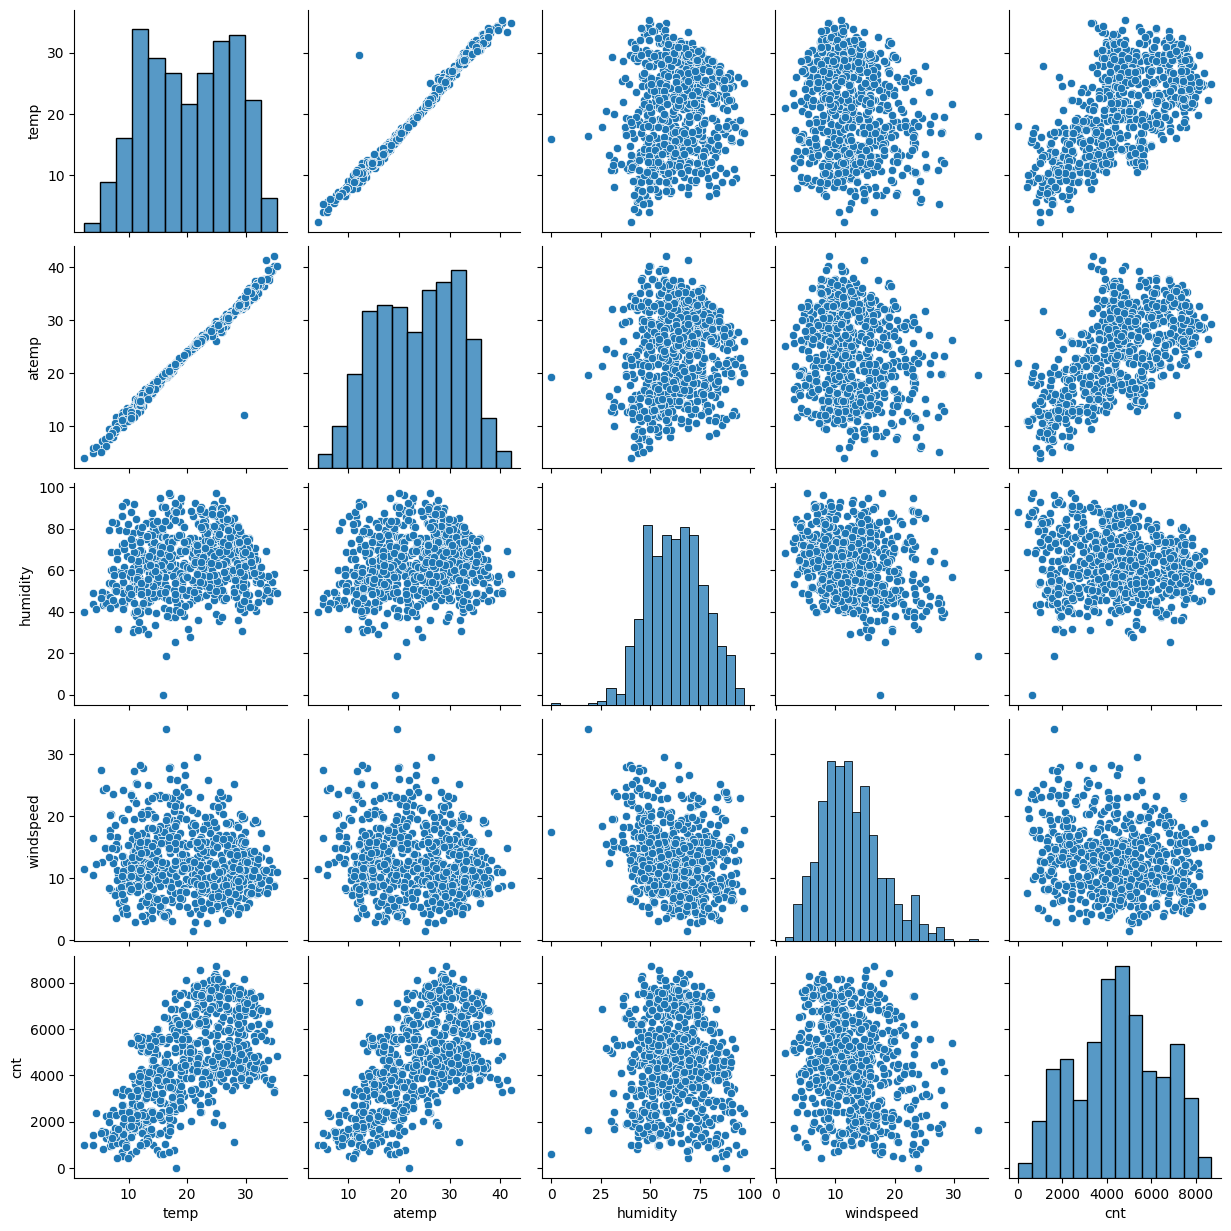

In [9]:
# Plotting the numerical data to analyse correlations and anomalies if any
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

<b> Observation </b> `There's a good correlation between temp and target variable cnt, similar trend can be seen in 'atemp' as well. Other variables show little to no correlation with 'cnt'`

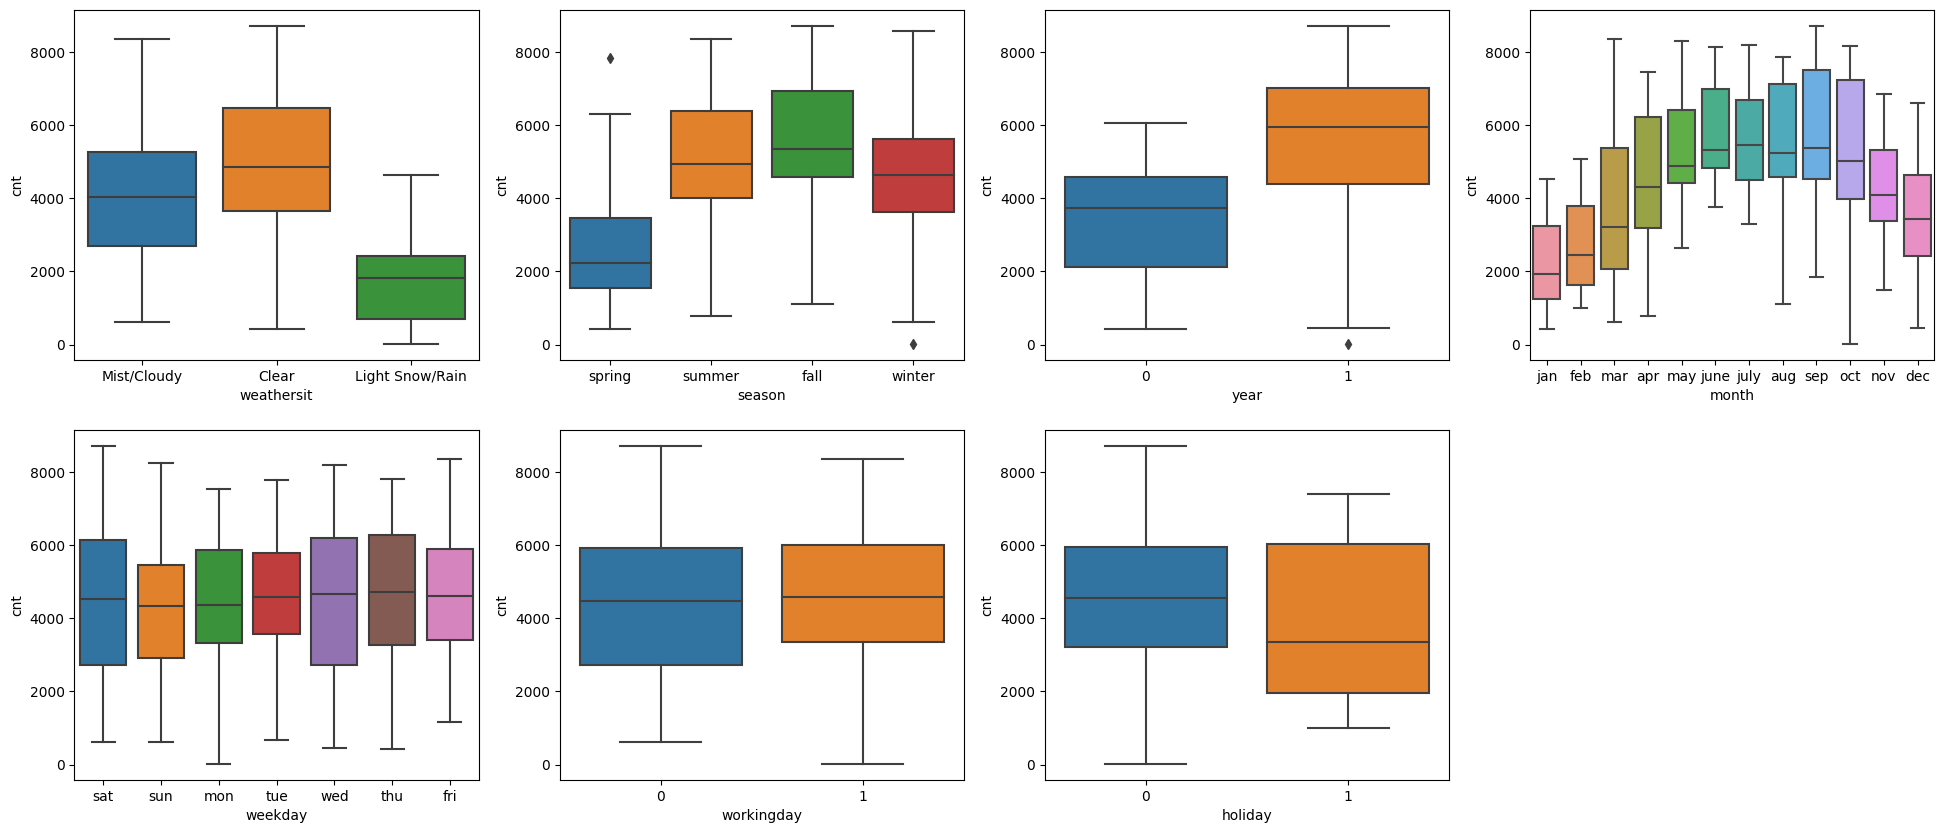

In [10]:
# Plotting categorical data wrt target variable
plt.figure(figsize=(24,10))
plt.subplot(2,4,1)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='year',y='cnt',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='month',y='cnt',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.show()

<b> Observation </b> ` There are no outliers in categorical variables, spreads of variables wrt target variable is also good.`

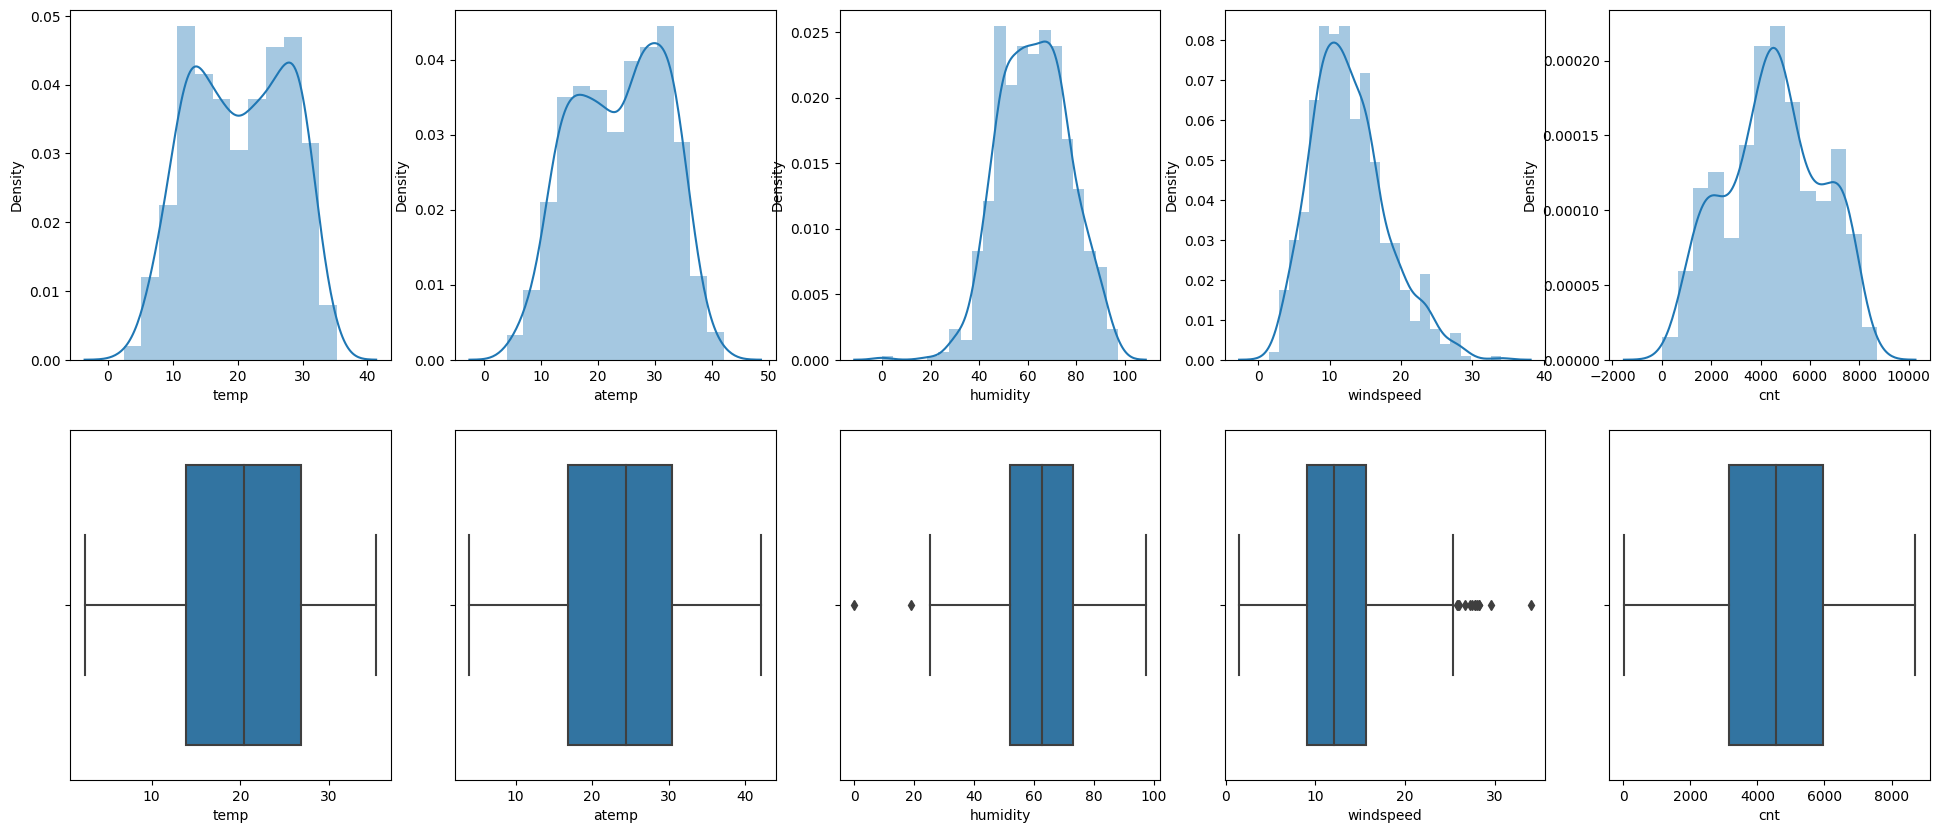

In [11]:
# Univariate analysis:  Plotting histogram and boxplot distribution of numerical veriables
plt.figure(figsize=(24,10))
plt.subplot(2,5,1)
sns.distplot(df['temp'])
plt.subplot(2,5,2)
sns.distplot(df['atemp'])
plt.subplot(2,5,3)
sns.distplot(df['humidity'])
plt.subplot(2,5,4)
sns.distplot(df['windspeed'])
plt.subplot(2,5,5)
sns.distplot(df['cnt'])
plt.subplot(2,5,6)
sns.boxplot(x=df['temp'])
plt.subplot(2,5,7)
sns.boxplot(x=df['atemp'])
plt.subplot(2,5,8)
sns.boxplot(x=df['humidity'])
plt.subplot(2,5,9)
sns.boxplot(x=df['windspeed'])
plt.subplot(2,5,10)
sns.boxplot(x=df['cnt'])
plt.show()

<b> Observation </b> `There's no outliers in continuous variables, temp mean lies close to 20 with 25% and 75% between 10 and 30 degree celcius, similar trend is seen in temp.`
<br> - `Humidity has mean around 60 with 25% and 75% lying in range 50 to 80.`
<br> - `Windspeed mean is around 15, with 25% and 75% lying in range 8 to 20`.
<br> - `Target variable cnt has mean value centered around 4500 and it's 25% and 75% quantiles lie in range 2500 to 6000.`


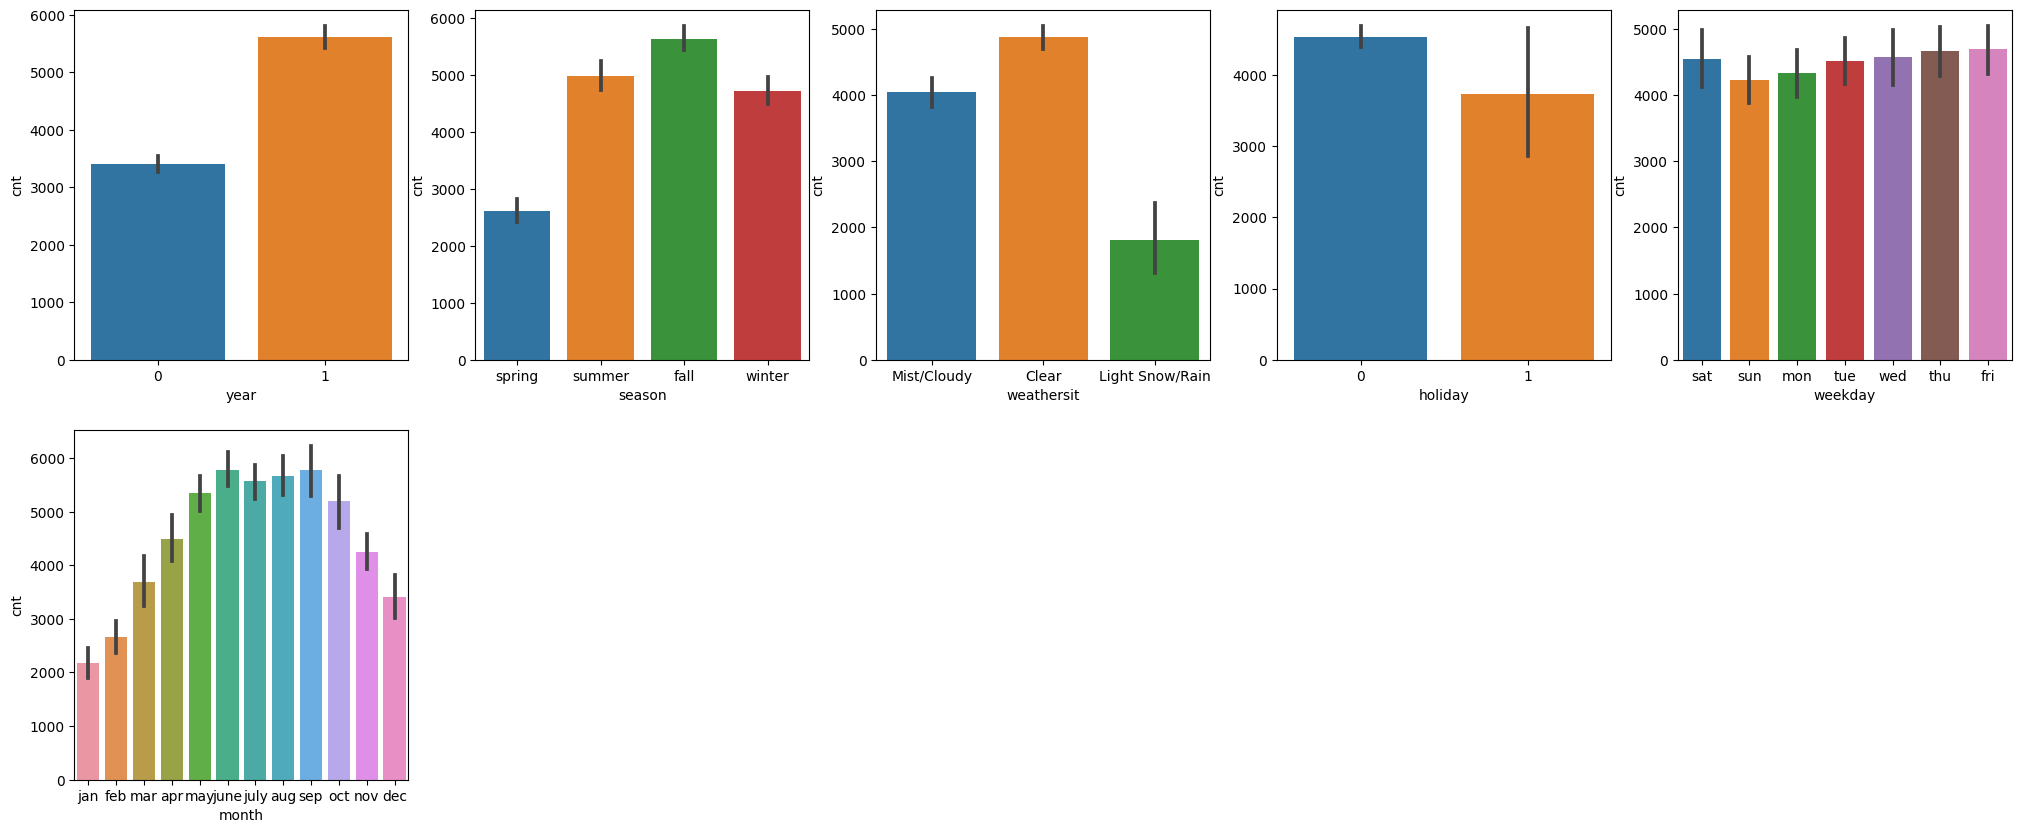

In [12]:
# Bivariate analysis:  relation of variables with target variable
plt.figure(figsize=(25,10))
plt.subplot(2,5,1)
sns.barplot(x=df['year'],y=df['cnt'])
plt.subplot(2,5,2)
sns.barplot(x=df['season'],y=df['cnt'])
plt.subplot(2,5,3)
sns.barplot(x=df['weathersit'],y=df['cnt'])
plt.subplot(2,5,4)
sns.barplot(x=df['holiday'],y=df['cnt'])
plt.subplot(2,5,5)
sns.barplot(x=df['weekday'],y=df['cnt'])
plt.subplot(2,5,6)
sns.barplot(x=df['month'],y=df['cnt'])
plt.show()


<b>Observation</b>  `Year 2019,season fall, clear weather,month july and sep and holiday has more bookings`

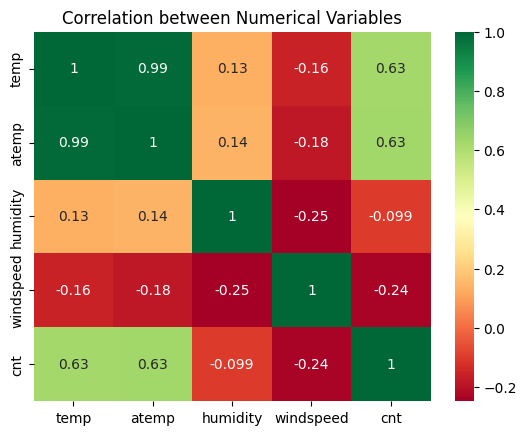

In [13]:
# Visualising correlation between numerical variables and target variable
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

## Data Preparation

In [14]:
# creating dummies for categorical variables

months_dum=pd.get_dummies(df.month,drop_first=True)
weekday_dum=pd.get_dummies(df.weekday,drop_first=True)
year_dum=pd.get_dummies(df.year,drop_first=True)
wrkday_dum=pd.get_dummies(df.workingday,drop_first=True)
holiday_dum=pd.get_dummies(df.holiday,drop_first=True)
season_dum=pd.get_dummies(df.season,drop_first=True)
weathersit_dum=pd.get_dummies(df.weathersit,drop_first=True)

In [15]:
# creating dataset with required features and dummmies
df_update=df[['temp','atemp','humidity','windspeed','cnt','year','holiday','workingday']]
df_update=pd.concat([df_update,months_dum,weekday_dum,season_dum,weathersit_dum],axis=1)

In [16]:
df_update.shape

(730, 30)

In [17]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             730 non-null    float64
 1   atemp            730 non-null    float64
 2   humidity         730 non-null    float64
 3   windspeed        730 non-null    float64
 4   cnt              730 non-null    int64  
 5   year             730 non-null    int64  
 6   holiday          730 non-null    int64  
 7   workingday       730 non-null    int64  
 8   aug              730 non-null    uint8  
 9   dec              730 non-null    uint8  
 10  feb              730 non-null    uint8  
 11  jan              730 non-null    uint8  
 12  july             730 non-null    uint8  
 13  june             730 non-null    uint8  
 14  mar              730 non-null    uint8  
 15  may              730 non-null    uint8  
 16  nov              730 non-null    uint8  
 17  oct             

<b> Spitting dataset into Train and Test Data</b>

In [18]:
# splitting data into training and testing data
df_train, df_test = train_test_split(df_update, train_size = 0.7, random_state =42)

In [19]:
# Analysing train data
df_train.shape

(510, 30)

In [20]:
# Scaling the training data numerical features
scaler=MinMaxScaler()
numeric_vars=['temp','atemp','humidity','windspeed','cnt']
df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])

In [21]:
# Splitting independent and dependent variables
y_train=df_train.pop('cnt')
X_train=df_train

<b> Using Recursive Feature Elimination for feature selection

In [22]:
# Initialising Linear Regression and RFE for automated feature selection
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [23]:
# List of features by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 8),
 ('jan', False, 14),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', True, 1),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thu', False, 13),
 ('tue', False, 7),
 ('wed', False, 12),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist/Cloudy', True, 1)]

In [24]:
# List of features rejected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'aug', 'feb', 'jan', 'june', 'may', 'oct',
       'mon', 'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [25]:
col=X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'humidity', 'windspeed', 'year', 'dec', 'july', 'mar',
       'nov', 'sep', 'sat', 'spring', 'winter', 'Light Snow/Rain',
       'Mist/Cloudy'],
      dtype='object')

In [26]:
# Using features selected by RFE for creating linear regression analysis
X_train_rfe=X_train[col]
# Checking for collinearity among variables using VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,1225.70
0,temp,1196.45
2,humidity,25.44
3,windspeed,5.37
12,winter,2.74
11,spring,2.73
14,Mist/Cloudy,2.27
4,year,2.09
8,nov,1.82
6,july,1.49


<b>Observation:</b> `Variable temp and atemp have high VIF value therefore there's multicollinearity in data`

### Model-1

In [27]:
#fitting linear regression algorithm to dataset, building first model
X_train_lm1=sm.add_constant(X_train_rfe)
lm_1=sm.OLS(y_train,X_train_lm1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.07e-184
Time:                        15:15:26   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3283      0.037     

<b>Observation :</b> ` Variable Temp has high p-value this implies low significance and high VIF factor,therefore dropping it and checking for multicollinearity again`

In [28]:
# Calculating VIF again after dropping temp column
X_new=X_train_rfe.drop('temp',axis=1)
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,humidity,24.88
0,atemp,17.36
2,windspeed,5.03
10,spring,2.72
11,winter,2.69
13,Mist/Cloudy,2.26
3,year,2.09
7,nov,1.82
5,july,1.48
4,dec,1.37


### Model-2

In [29]:
X_train_lm2=sm.add_constant(X_new)
lm_2=sm.OLS(y_train,X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          7.79e-186
Time:                        15:15:26   Log-Likelihood:                 482.57
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     495   BIC:                            -871.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3282      0.037     

<b> Observation: </b> `Variable Sat has high p-value, dropping it and recalculating VIF factor`

In [30]:
X_new=X_new.drop('sat',axis=1)
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,humidity,24.79
0,atemp,17.35
2,windspeed,4.99
9,spring,2.72
10,winter,2.69
12,Mist/Cloudy,2.25
3,year,2.09
7,nov,1.82
5,july,1.48
4,dec,1.37


### Model-3

In [31]:
X_train_lm3=sm.add_constant(X_new)
lm_3=sm.OLS(y_train,X_train_lm3).fit()
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.66e-186
Time:                        15:15:26   Log-Likelihood:                 481.42
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     496   BIC:                            -875.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3328      0.037     

<b> Observation: </b> `Variable March has high p-value, dropping it and recalculating VIF factor`

In [32]:
X_new=X_new.drop('mar',axis=1)
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,humidity,24.78
0,atemp,17.31
2,windspeed,4.99
9,winter,2.69
8,spring,2.62
11,Mist/Cloudy,2.24
3,year,2.09
6,nov,1.82
5,july,1.47
4,dec,1.36


### Model-4

In [33]:
X_train_lm4=sm.add_constant(X_new)
lm_4=sm.OLS(y_train,X_train_lm4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.35e-186
Time:                        15:15:26   Log-Likelihood:                 477.64
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     497   BIC:                            -874.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3408      0.037     

<b> Observation: </b> `Variable humidity has high VIF value, causing multicollinearity in model dropping it and recalculating VIF factor`

In [34]:
X_new=X_new.drop('humidity',axis=1)
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,atemp,5.31
1,windspeed,4.94
8,winter,2.36
2,year,2.08
5,nov,1.77
7,spring,1.70
10,Mist/Cloudy,1.56
4,july,1.42
3,dec,1.31
6,sep,1.23


### Model-5

In [35]:
X_train_lm5=sm.add_constant(X_new)
lm_5=sm.OLS(y_train,X_train_lm5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.53e-183
Time:                        15:15:26   Log-Likelihood:                 468.28
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     498   BIC:                            -861.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2409      0.029     

### Model-6

In [36]:
X_new=X_new.drop('sep',axis=1)
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,atemp,4.93
1,windspeed,4.91
7,winter,2.35
2,year,2.08
5,nov,1.75
6,spring,1.69
9,Mist/Cloudy,1.56
4,july,1.37
3,dec,1.31
8,Light Snow/Rain,1.10


In [37]:
X_train_lm6=sm.add_constant(X_new)
lm_6=sm.OLS(y_train,X_train_lm6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.06e-182
Time:                        15:15:27   Log-Likelihood:                 463.96
No. Observations:                 510   AIC:                            -905.9
Df Residuals:                     499   BIC:                            -859.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2400      0.030     

<b> Observation </b> `Since p-value for all features is 0 also VIF value <5, hence we can use this model to make predictions`

## Residual Analysis of the train data and validation

In [38]:
y_train_pred=lm_6.predict(X_train_lm6)

<b> Normality of Error Terms</b>

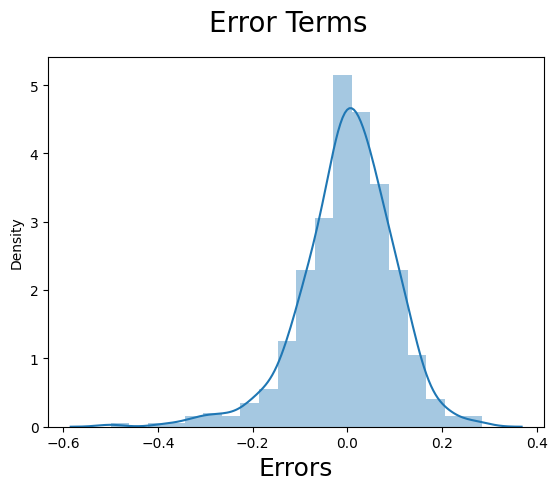

In [39]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

<b>Observation</b> `Error terms are normally distributed`

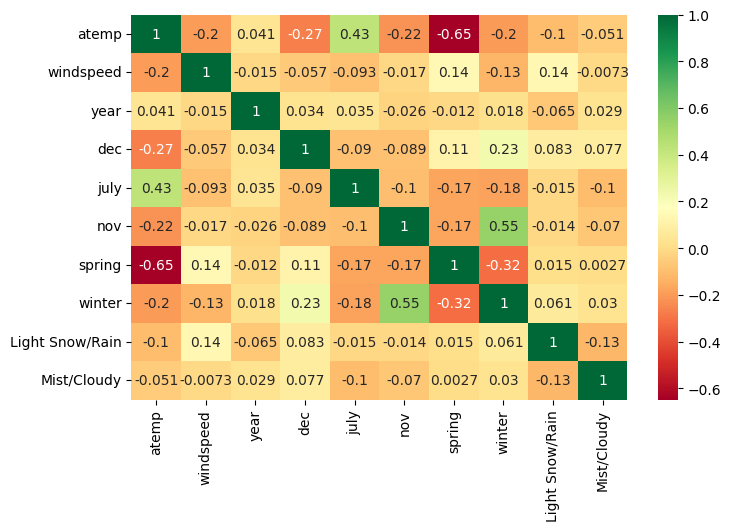

In [40]:
plt.figure(figsize=(8,5))
sns.heatmap(X_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [41]:
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,atemp,4.93
1,windspeed,4.91
7,winter,2.35
2,year,2.08
5,nov,1.75
6,spring,1.69
9,Mist/Cloudy,1.56
4,july,1.37
3,dec,1.31
8,Light Snow/Rain,1.10


<B> Observation </b> `VIF factor is less than 5 for all features,and there's no multicollinearity among independent variables`

<b> Homoscedasticity</b>

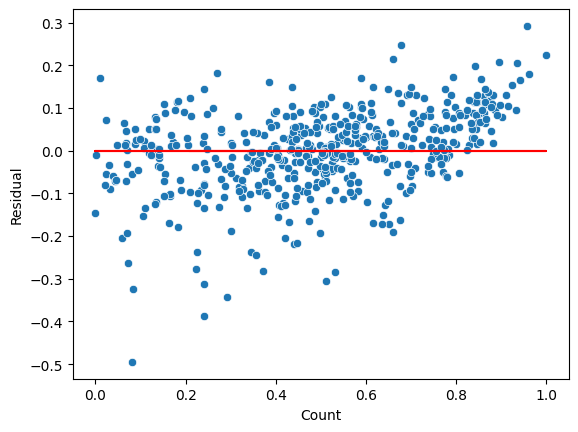

In [42]:
y_train_pred = lm_5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<b>Observation</b> `No pattern observed in residuals plot`

## Making Predictions from final model

<b> Scaling the Test Dataset</b>

In [43]:
# Scaling test data for predictions
numeric_vars=['temp','atemp','humidity','windspeed','cnt']
df_test[numeric_vars]=scaler.transform(df_test[numeric_vars])
df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [44]:
# Creating y-test and X-test
y_test=df_test.pop('cnt')
X_test=df_test
X_test_1=X_test[X_new.columns]
X_test_1=sm.add_constant(X_test_1)
# Predicting on test data using model-6
y_pred=lm_6.predict(X_test_1)

## Model  Evaluation

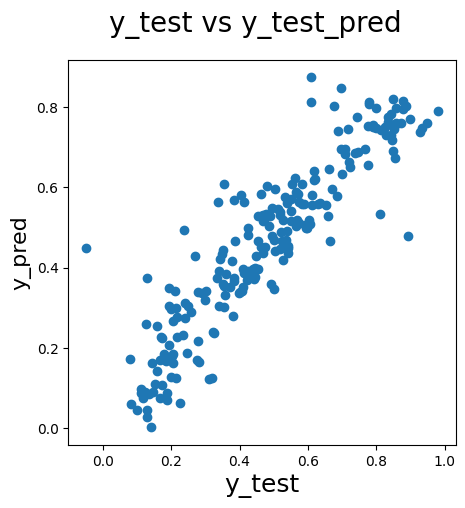

In [49]:
fig = plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [46]:
lm_6.params

const              0.240014
atemp              0.455107
windspeed         -0.088589
year               0.242765
dec               -0.078309
july              -0.066158
nov               -0.092593
spring            -0.157669
winter             0.083469
Light Snow/Rain   -0.258662
Mist/Cloudy       -0.081654
dtype: float64

<b> Multiple linear regression equation: </b>
$ cnt=0.240014 + atemp * 0.455107 - windspeed * 0.088589 +
 year * 0.242765 - dec* 0.078309 - july * 0.66158 - nov * 0.092593 - spring * 0.157669 + winter * 0.083469 - Light Snow * 0.258663 - Mist * 0.081654 $

In [47]:
# Calculating R2 value for test data
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8126

In [48]:
# Calculating adjusted R2 value for test data
adjusted_r2 = round(1-(1-r2)*(X_test_1.shape[0]-1)/(X_test_1.shape[0]-X_test_1.shape[1]-1),4)
print(adjusted_r2)

0.8027


## Conclusion

<B> Demand of bikes in dependent on </B> 
- Year,windspeed,december, july, Spring, Winter, november, atemp, Light Snow/Rain and Mist/Cloudy

### Comparision between Training and Testing dataset:
- Train set R2 = 0.827
- Test set R2  = 0.8126
- Train set Adjusted R2 = 0.823
- Test set Adjusted R2  = 0.8027